<a href="https://colab.research.google.com/github/sariya23/Halava/blob/main/Pandas%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%A1%D0%A0%D0%B0%D0%B7%D0%BD%D1%8B%D0%BC%D0%B8%D0%98%D1%81%D1%82%D0%BE%D1%87%D0%BD%D0%B8%D0%BA%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np

# Формат CSV и функция ```csv_read()```

Для чтения данных из csv файлов используется функция ```read_csv()```



In [ ]:
df = pd.read_csv('student.csv')

In [ ]:
df.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


## Параметр ```sep```

Так как это csv файл(**comma** separated values), то нам необязательно передавать в качестве разделителя запятую, так как она по умолчанию.

Однаков если в csv файле разделитель другой, его нужно указать

In [ ]:
df = pd.read_csv('test_semicolon.csv')

In [ ]:
df.head()

,name;age;buy
0,Ivan;12;0
1,Ana;20;1


В файле в качестве разделителя указана ;, поэтому все отображается некорректно

Нужно передать аругмент ```sep```

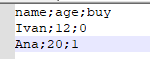

In [ ]:
df = pd.read_csv('test_semicolon.csv', sep=';')

In [ ]:
df.head()

,name,age,buy
0,Ivan,12,0
1,Ana,20,1


## Параметр ```header```

Так же может быть такое, что в файле пропадут заголовки, чтобы решить эту пробелму, т.е строка со значениями становится заголовками, нужно передать аргумент ```header=None```. Тогда заголовки пронумеруются

In [ ]:
df = pd.read_csv('no_header.csv')

In [ ]:
df.head()

,Ivan,20,0
0,Ana,19,1
1,Jon,67,0


In [ ]:
df = pd.read_csv('no_header.csv', header=None)

In [ ]:
df.head()

,0,1,2
0,Ivan,20,0
1,Ana,19,1
2,Jon,67,0


## Параметр ```name```

Можно на этапе чтения файла переименовать(или если в файле они пропущены) колонки.

In [ ]:
df = pd.read_csv('no_header.csv', names=['name', 'age', 'is_workless'])

In [ ]:
df.head()

,name,age,is_workless
0,Ivan,20,0
1,Ana,19,1
2,Jon,67,0


Если заголовки есть, но мы хотим другие, нужно обнулить ```header```

Иначе будет добавиться еще одна строка со старыми заголовками

In [ ]:
df = pd.read_csv('test_semicolon.csv', sep=';', names=['name', 'age', 'is_workless'])

In [ ]:
df.head()

,name,age,is_workless
0,name,age,buy
1,Ivan,12,0
2,Ana,20,1


In [ ]:
df = pd.read_csv('test_semicolon.csv', sep=';', names=['name', 'age', 'is_workless'], header=0)

In [ ]:
df

,name,age,is_workless
0,Ivan,12,0
1,Ana,20,1


## Параметр ```index_col```

Мы может сделать какую-то колонку индексом, либо передаем ее порядковый номер с нуля

In [ ]:
df = pd.read_csv('student.csv', index_col='name')
df.head()

,id,class,mark,gender
name,,,,
John Deo,1,Four,75,female
Max Ruin,2,Three,85,male
Arnold,3,Three,55,male
Krish Star,4,Four,60,female
John Mike,5,Four,60,female


## Параметр ```skiprows```

Может быть такое, что какая-то строчка в csv файле является комментарием, битой или еще что-то. При чтении такого файла мы можем указать номера строк, которые стоит пропустить при чтении

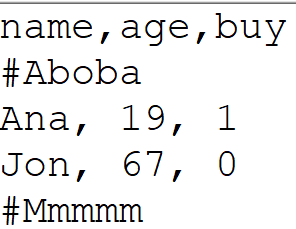

In [ ]:
df = pd.read_csv('test.csv')
df.head()

,name,age,buy
0,#Aboba,NaN,NaN
1,Ana,19.0,1.0
2,Jon,67.0,0.0
3,#Mmmmm,NaN,NaN


In [ ]:
df = pd.read_csv('test.csv', skiprows=[1, 4])
df.head()

,name,age,buy
0,Ana,19,1
1,Jon,67,0


## Параметр ```chunksize```

Когда у нас большой файл, мы можем на его основе создать итератор, который будет по частям выдавать нам данные. Значение параметра означает количество строк в каждом кусочке

In [ ]:
reader = pd.read_csv('test.csv', chunksize=2)

In [ ]:
for i in reader:
    print(i)
    print('---')

  client  balance  age
0   Ivan       -1   -1
1    Ana      100   12
---
  client  balance  age
2    Ana      100   12
3    Ana      100   12
---
  client  balance  age
4    Ana      100   12
5    Ana      100   12
---
  client  balance  age
6    Ana      100   12
7    Ana      100   12
---
  client  balance  age
8    Ana      100   12
9    Ana      100   12
---
   client  balance  age
10    Ana      100   12
11    Ana      100   12
---
   client  balance  age
12    Ana      100   12
13    Ana      100   12
---
   client  balance  age
14    Ana      100   12
15    Ana      100   12
---
   client  balance  age
16    Ana      100   12
17    Ana      100   12
---
   client  balance  age
18    Ana      100   12
19    Ana      100   12
---
   client  balance  age
20    Ana      100   12
21    Ana      100   12
---
   client  balance  age
22    Ana      100   12
23    Ana      100   12
---
   client  balance  age
24    Ana      100   12
25    Ana      100   12
---
   client  balance  age
26 

Предположим у нас есть большой файл и мы хотим посчитать сколько каждого имени встречается

In [ ]:
reader = pd.read_csv('student.csv', index_col='id', chunksize=2)

In [ ]:
names = pd.Series([])

<ipython-input-24-15ed640c3b11>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  names = pd.Series([])


In [ ]:
for i in reader:
    names = names.add(i['name'].value_counts(), fill_value=0)

In [ ]:
names

Alex John      1.0
Arnold         1.0
Asruid         1.0
Babby John     1.0
Big John       1.0
Big Nose       1.0
Bigy           1.0
Binn Rott      1.0
Crelea         1.0
Gain Toe       1.0
Giff Tow       1.0
Gimmy          1.0
Herod          1.0
Honny          1.0
Jackly         1.0
John Deo       1.0
John Mike      1.0
Kenn Rein      1.0
Krish Star     1.0
Kty            1.0
Marry Toeey    1.0
Max Ruin       1.0
My John Rob    1.0
Recky          1.0
Reggid         1.0
Reppy Red      1.0
Rojj Base      1.0
Ronald         1.0
Rows Noump     1.0
Tade Row       1.0
Tes Qry        1.0
Tess Played    1.0
Tiddy Now      1.0
Tinny          1.0
Tumyu          1.0
dtype: float64

## Пропуски

### Параметр ```na_filter```

Если мы уверены, что в данных нет пропусков, можно отключить поиск и их конвертацию

Но если они есть, то будет ничего

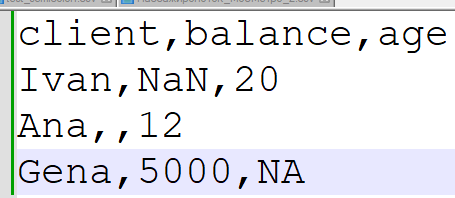

In [ ]:
df = pd.read_csv('test.csv', na_filter=False)
df.head()

,client,balance,age
0,Ivan,NaN,20
1,Ana,,12
2,Gena,5000,NA


In [ ]:
df.iloc[1, 1]

''

In [ ]:
pd.isnull(df)

,client,balance,age
0,False,False,False
1,False,False,False
2,False,False,False


Как видно, для pandas пропусков нет, а NaN воспринимается просто как строка

### Параметр ```na_values``` 

По умолчанию в функцию зашит набор значений, которые будут считаться за пропуск. Но мы может добавить к этому набору свои значения с помощью параметра ```na_values```

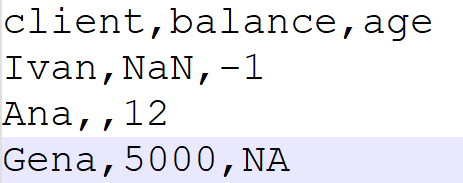

In [ ]:
df = pd.read_csv('test.csv', na_values=[-1])
df.head()

,client,balance,age
0,Ivan,NaN,NaN
1,Ana,NaN,12.0
2,Gena,5000.0,NaN


In [ ]:
pd.isnull(df)

,client,balance,age
0,False,True,True
1,False,True,False
2,False,False,True


Как видно, наша -1 воспринилась как пропуск

Но может быть такой, что в одной колонке такое значение это пропуск, а в другой нет. Для решения этой проблемы мы можем передать словарь, где ключ - это название колонки, а значение список(одно значение) со значениями пропусками

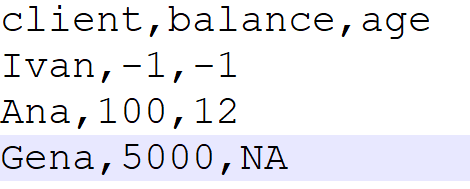

In [ ]:
df = pd.read_csv('test.csv', na_values={'age': ['-1']})
df.head()

,client,balance,age
0,Ivan,-1,NaN
1,Ana,100,12.0
2,Gena,5000,NaN


В колонке age значение -1 расценилось как пропуск, а в balance нет

## Параметр ```nrows```

Если файл очень большой и на не нужен весь файл, то можно передать количество строк для чтения. При этом весь файл загружен не будет, будут только n строк

In [ ]:
df = pd.read_csv('test.csv')
df.shape

(19, 3)

In [ ]:
df = pd.read_csv('test.csv', nrows=6)
df.shape

(6, 3)

## Задача

In [ ]:
df = pd.read_csv('task.csv', sep=';', header=1)
df.head()

,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en,Unnamed: 13
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031,1138975996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309,1138975997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731,1138975999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208,1138976000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343,1138976008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.isnan(df.NameOfStation_en).all()

True

In [ ]:
all_nan = []

for i in df.columns:
    if pd.isnull(df[i]).all():
        all_nan.append(i)
all_nan

['NameOfStation_en',
 'Line_en',
 'Year_en',
 'Quarter_en',
 'IncomingPassengers_en',
 'OutgoingPassengers_en',
 'Unnamed: 13']

In [ ]:
df.drop(all_nan, inplace=True, axis=1)

In [ ]:
df.head()

,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498,1829031,1138975996
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714,1222309,1138975997
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816,1903731,1138975999
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616,1818208,1138976000
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687,2319343,1138976008


In [ ]:
df['Квартал'] = df['Квартал'].apply(lambda x: x.replace(' квартал', ''))

In [ ]:
np.unique(df['Квартал'])

array(['I', 'II', 'III', 'IV'], dtype=object)

In [ ]:
np.unique(df['Год'])

array([2021, 2022])

In [ ]:
df['Станция метрополитена'].size == np.unique(df['Станция метрополитена'].size)

array([ True])

In [ ]:
df1 = df[(df['Квартал'] == 'IV') & (df['Год'] == 2021)]
df1.head()

,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id
802,Пятницкое шоссе,Арбатско-Покровская линия,2021,IV,1568663,1481411,1508957389
803,Митино,Арбатско-Покровская линия,2021,IV,2217044,2090460,1508957391
804,Славянский бульвар,Арбатско-Покровская линия,2021,IV,5167881,5076680,1508957412
805,Киевская,Арбатско-Покровская линия,2021,IV,3905787,3652754,1508957821
806,Смоленская,Арбатско-Покровская линия,2021,IV,1968177,2052477,1508957824


In [ ]:
df1.loc[df1['Входы пассажиров'] == df1['Входы пассажиров'].max(), 'Станция метрополитена']

956    Комсомольская
Name: Станция метрополитена, dtype: object

# Обработка пропусков

Бывает такое, что в файле пропущены значения

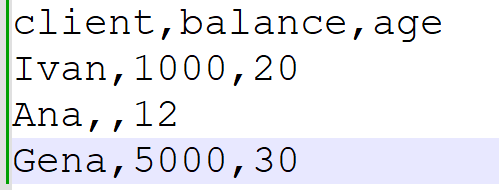

Функция ```read_csv()``` заменит пропуски на ```NaN```

In [ ]:
df = pd.read_csv('test.csv')
df.head()

,client,balance,age
0,Ivan,1000.0,20
1,Ana,NaN,12
2,Gena,5000.0,30


Там, где пропущены значения(то есть вообще ничего нет, так как пробел тоже символ) функция поставит ```NaN```

In [ ]:
pd.isnull(df)

,client,balance,age
0,False,False,False
1,False,True,False
2,False,False,False


Но не только пропуск будет считаться на ```NaN```. У функции есть свой список значений, который она расценивает как пропуск

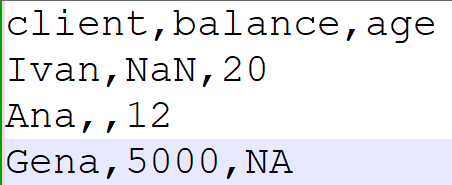

In [ ]:
df = pd.read_csv('test.csv')
df.head()

,client,balance,age
0,Ivan,NaN,20.0
1,Ana,NaN,12.0
2,Gena,5000.0,NaN


## Задача 2

In [ ]:
df = pd.read_csv('task2.csv', skiprows=[0, 1, 2, 3, 6, 1380], sep='|', header=1)
df.head()

,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en,Unnamed: 13
0,Митино,Арбатско-Покровская линия,2021.0,I квартал,1913498.0,1829031.0,1.138976e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Волоколамская,Арбатско-Покровская линия,2021.0,I квартал,1236714.0,1222309.0,1.138976e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Строгино,Арбатско-Покровская линия,2021.0,I квартал,1938816.0,1903731.0,1.138976e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Крылатское,Арбатско-Покровская линия,2021.0,I квартал,1849616.0,1818208.0,1.138976e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Площадь Революции,Арбатско-Покровская линия,2021.0,I квартал,2324687.0,2319343.0,1.138976e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Входы пассажиров'].sum()

2514195123.0

## Задача 3

In [ ]:
df = pd.read_csv('task3.csv', sep='|', header=1, na_values={'Станция метрополитена': [0, 'NULL', 'None', 'не указано'],
                                                            'Линия': [0, 'NULL', 'None', 'не указано'],
                                                            'Год': [0, 'NULL', 'None', 'не указано'],
                                                            'Квартал': [0, 'NULL', 'None', 'не указано'],
                                                            'Входы пассажиров': [0, 'NULL', 'None', 'не указано'],
                                                            'Выходы пассажиров': ['NULL', 'None', 'не указано'],
                                                            'global_id': [0, 'NULL', 'None', 'не указано']})
df.head()

,Станция метрополитена,Линия,Год,Квартал,Входы пассажиров,Выходы пассажиров,global_id,NameOfStation_en,Line_en,Year_en,Quarter_en,IncomingPassengers_en,OutgoingPassengers_en,Unnamed: 13
0,Митино,Арбатско-Покровская линия,2021,I квартал,1913498.0,1829031.0,1138975996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Волоколамская,Арбатско-Покровская линия,2021,I квартал,1236714.0,1222309.0,1138975997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Строгино,Арбатско-Покровская линия,2021,I квартал,1938816.0,1903731.0,1138975999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Крылатское,Арбатско-Покровская линия,2021,I квартал,1849616.0,1818208.0,1138976000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Площадь Революции,Арбатско-Покровская линия,2021,I квартал,2324687.0,2319343.0,1138976008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.isnull(df['Входы пассажиров']).sum()

37

# Чтение больших файлов кусочками и сохранение в csv 



После обработки какого-то файла мы можем сохранить DataFrame в csv файл. Для этого используется метод ```.to_csv()```

In [ ]:
df = pd.read_csv('student.csv', index_col='id')
df.head()

,name,class,mark,gender
id,,,,
1,John Deo,Four,75,female
2,Max Ruin,Three,85,male
3,Arnold,Three,55,male
4,Krish Star,Four,60,female
5,John Mike,Four,60,female


In [ ]:
df2 = df[df['gender'] == 'male']
df2.head()

,name,class,mark,gender
id,,,,
2,Max Ruin,Three,85,male
3,Arnold,Three,55,male
6,Alex John,Four,55,male
7,My John Rob,Fifth,78,male
8,Asruid,Five,85,male


In [ ]:
df2.to_csv(r'C:\Users\dayyy\god_damn\out.csv', sep=sep, na_rep='NaN')

По умолчанию ```sep``` будет запятой, но мы можем это изменить

Так же если у нас есть пропуски, то по умолчанию в файле просто не будет значения, это можно изменить значением параметра ```na_rep```(nan representation)

Если нам нужны только некоторые столюцы для сохранения, то для этого нужно перечислить их в параметр ```columns```. Вместо того, чтобы делать срезы

In [ ]:
df.head()

,name,class,mark,gender
id,,,,
1,John Deo,Four,75,female
2,Max Ruin,Three,85,male
3,Arnold,Three,55,male
4,Krish Star,Four,60,female
5,John Mike,Four,60,female


In [ ]:
df.to_csv('out.csv', sep='|', columns=['name', 'class'])

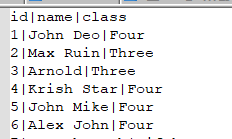

Вместо такого:

In [ ]:
df[['name', 'class']].to_csv('out.csv', sep='|')

Так же если на в результате не нужнгы индексы, то мы можем передать аргумент ```index=False```

In [ ]:
df.to_csv('out.csv', sep='|', columns=['name', 'class'], index=False)

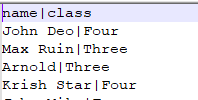

Если не нужны заголовки - передаем параметр ```header=False```

In [ ]:
df.to_csv('out.csv', sep='|', columns=['name', 'class'], index=False, header=False)

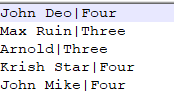

## Задача 4

In [ ]:
df = pd.read_csv('users.csv', sep=';')
df.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,Records manager,Duncan-Garcia,241-62-8803,"309 Danielle Cliffs\nNorth Amy, NC 69960","(Decimal('-79.694044'), Decimal('145.837904'))",AB+,"['http://www.lara-atkins.info/', 'https://vela...",lambertemma,Stacy Reed,F,"9881 Brown Mission\nWest Marcus, CO 88576",vsmith@yahoo.com,1980-01-04
1,Mental health nurse,Rose-Lee,899-12-4937,Unit 5929 Box 0845\nDPO AE 45149,"(Decimal('16.6696785'), Decimal('-38.243842'))",A-,"['http://jackson-sanchez.net/', 'https://www.g...",greid,Carol Farley,F,USNS Burke\nFPO AE 09663,graceholloway@yahoo.com,1918-07-08
2,Furniture conservator/restorer,Potts and Sons,261-41-9484,"130 Vargas Trail Apt. 244\nNorth Rebecca, WV 1...","(Decimal('-27.9623815'), Decimal('75.091620'))",B-,"['https://www.mclaughlin.com/', 'http://www.gi...",scottmercado,Russell Whitaker,M,"9023 Julie Highway\nJonathanfurt, NE 70139",ghart@gmail.com,1946-09-11
3,Ambulance person,Rivera Inc,201-43-6181,"7173 Adrian Shoal\nWest Paul, NJ 24509","(Decimal('20.706462'), Decimal('-99.445622'))",B-,"['https://smith.net/', 'https://garcia-nichols...",kristin75,Maureen Powers,F,9431 Cunningham Divide Suite 663\nKnightcheste...,stacy77@yahoo.com,1960-07-01
4,Contracting civil engineer,Hatfield Group,878-83-6667,"558 Andrea Prairie Apt. 869\nGeraldside, TX 73555","(Decimal('-5.886452'), Decimal('105.424264'))",O+,['https://curry-mitchell.com/'],lhansen,Edward Mcdonald,M,"58853 Jennifer Brooks Suite 754\nMichaelfort, ...",emoore@yahoo.com,1940-10-02


In [ ]:
df_res = df[df['sex'] == 'F']

In [ ]:
df_res.to_csv('res.csv', index=False, columns=['username', 'mail'], sep=';')

## Задача 5

In [50]:
df = pd.read_csv('users1.csv', sep=';', nrows=50)
df.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,Records manager,Duncan-Garcia,241-62-8803,"309 Danielle Cliffs\nNorth Amy, NC 69960","(Decimal('-79.694044'), Decimal('145.837904'))",AB+,"['http://www.lara-atkins.info/', 'https://vela...",lambertemma,Stacy Reed,F,"9881 Brown Mission\nWest Marcus, CO 88576",vsmith@yahoo.com,1980-01-04
1,Mental health nurse,Rose-Lee,899-12-4937,Unit 5929 Box 0845\nDPO AE 45149,"(Decimal('16.6696785'), Decimal('-38.243842'))",A-,"['http://jackson-sanchez.net/', 'https://www.g...",greid,Carol Farley,F,USNS Burke\nFPO AE 09663,graceholloway@yahoo.com,1918-07-08
2,Furniture conservator/restorer,Potts and Sons,261-41-9484,"130 Vargas Trail Apt. 244\nNorth Rebecca, WV 1...","(Decimal('-27.9623815'), Decimal('75.091620'))",B-,"['https://www.mclaughlin.com/', 'http://www.gi...",scottmercado,Russell Whitaker,M,"9023 Julie Highway\nJonathanfurt, NE 70139",ghart@gmail.com,1946-09-11
3,Ambulance person,Rivera Inc,201-43-6181,"7173 Adrian Shoal\nWest Paul, NJ 24509","(Decimal('20.706462'), Decimal('-99.445622'))",B-,"['https://smith.net/', 'https://garcia-nichols...",kristin75,Maureen Powers,F,9431 Cunningham Divide Suite 663\nKnightcheste...,stacy77@yahoo.com,1960-07-01
4,Contracting civil engineer,Hatfield Group,878-83-6667,"558 Andrea Prairie Apt. 869\nGeraldside, TX 73555","(Decimal('-5.886452'), Decimal('105.424264'))",O+,['https://curry-mitchell.com/'],lhansen,Edward Mcdonald,M,"58853 Jennifer Brooks Suite 754\nMichaelfort, ...",emoore@yahoo.com,1940-10-02


In [51]:
df['sex'].value_counts()['M']

27

## Задача 6

In [55]:
reader = pd.read_csv('users2.csv', sep=';', chunksize=30)
counter = 0

In [56]:
for df in reader:
    if counter == 5:
        print(df.blood_group.value_counts()['A+'])
    counter += 1

4


In [ ]:
123